In [229]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import itertools

In [230]:
furniture = pd.read_csv("D:/Abhishek/time series furnitue sale forcasting/Super_Store.csv", sep= ",", encoding = "cp1252")

In [231]:
furniture.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
3,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
4,11,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


In [232]:
furniture.shape

(2121, 21)

In [233]:
furniture.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000
mean,5041.643564,55726.556341,349.834887,3.785007,0.173923,8.699327
std,2885.740258,32261.888225,503.179145,2.251620,0.181547,136.049246
min,1.000000,1040.000000,1.892000,1.000000,0.000000,-1862.312400
25%,2568.000000,22801.000000,47.040000,2.000000,0.000000,-12.849000
50%,5145.000000,60505.000000,182.220000,3.000000,0.200000,7.774800
75%,7534.000000,90032.000000,435.168000,5.000000,0.300000,33.726600
max,9991.000000,99301.000000,4416.174000,14.000000,0.700000,1013.127000


In [234]:
furniture.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         2121 non-null   int64  
 1   Order ID       2121 non-null   object 
 2   Order Date     2121 non-null   object 
 3   Ship Date      2121 non-null   object 
 4   Ship Mode      2121 non-null   object 
 5   Customer ID    2121 non-null   object 
 6   Customer Name  2121 non-null   object 
 7   Segment        2121 non-null   object 
 8   Country        2121 non-null   object 
 9   City           2121 non-null   object 
 10  State          2121 non-null   object 
 11  Postal Code    2121 non-null   int64  
 12  Region         2121 non-null   object 
 13  Product ID     2121 non-null   object 
 14  Category       2121 non-null   object 
 15  Sub-Category   2121 non-null   object 
 16  Product Name   2121 non-null   object 
 17  Sales          2121 non-null   float64
 18  Quantity

In [235]:
furniture["Order Date"].min()

'1/1/2017'

In [236]:
furniture["Order Date"].max()

'9/9/2017'

In [237]:
import datetime as dt

In [238]:
pd.to_datetime(furniture["Order Date"]).min()

Timestamp('2014-01-06 00:00:00')

In [239]:
pd.to_datetime(furniture["Order Date"]).max()

Timestamp('2017-12-30 00:00:00')

In [240]:
furniture.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [241]:
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Quantity', 'Discount', 'Profit']

In [242]:
furniture.drop(cols,axis = 1, inplace = True)

In [243]:
furniture.head()

,Order Date,Sales
0,11/8/2016,261.9600
1,11/8/2016,731.9400
2,10/11/2015,957.5775
3,6/9/2014,48.8600
4,6/9/2014,1706.1840


In [244]:
furniture = furniture.sort_values("Order Date")

In [245]:
furniture

,Order Date,Sales
845,1/1/2017,474.430
1707,1/1/2017,141.420
1708,1/1/2017,310.744
179,1/1/2017,48.896
181,1/10/2014,51.940
...,...,...
1524,9/9/2017,66.112
1152,9/9/2017,243.920
251,9/9/2017,17.024
250,9/9/2017,141.372


In [246]:
furniture =furniture.groupby("Order Date").sum().reset_index()

In [247]:
a = pd.to_datetime(furniture["Order Date"],).sort_values()

In [248]:
a

49    2014-01-06
50    2014-01-07
1     2014-01-10
4     2014-01-11
7     2014-01-13
         ...    
290   2017-12-24
293   2017-12-25
300   2017-12-28
303   2017-12-29
309   2017-12-30
Name: Order Date, Length: 889, dtype: datetime64[ns]

In [249]:
furniture["Order Date"]= a

In [250]:
furniture=  furniture.set_index("Order Date")

In [251]:
furniture

,Sales
Order Date,
2017-01-01,975.4900
2014-01-10,51.9400
2015-01-10,1018.1040
2016-01-10,104.7700
2014-01-11,9.9400
...,...
2016-09-08,3374.9816
2017-09-08,1000.2390
2014-09-09,864.0240


In [252]:
furniture.sort_index(inplace = True)

In [253]:
furniture

,Sales
Order Date,
2014-01-06,2573.8200
2014-01-07,76.7280
2014-01-10,51.9400
2014-01-11,9.9400
2014-01-13,879.9390
...,...
2017-12-24,1393.4940
2017-12-25,832.4540
2017-12-28,551.2568


In [254]:
# now lets resample the data according to month

In [255]:
y = furniture["Sales"].resample("MS").mean()

In [256]:
y

Order Date
2014-01-01     480.194231
2014-02-01     367.931600
2014-03-01     857.291529
2014-04-01     567.488357
2014-05-01     432.049188
2014-06-01     695.059242
2014-07-01     601.169500
2014-08-01     457.521656
2014-09-01     992.353367
2014-10-01     769.015437
2014-11-01     980.221486
2014-12-01    1532.298325
2015-01-01     978.328467
2015-02-01     522.395667
2015-03-01     781.236437
2015-04-01     805.822962
2015-05-01     624.996700
2015-06-01     428.565500
2015-07-01     719.706316
2015-08-01     602.412012
2015-09-01    1382.790684
2015-10-01     632.980184
2015-11-01    1286.701354
2015-12-01    1049.355418
2016-01-01     508.182867
2016-02-01     356.868273
2016-03-01     609.575810
2016-04-01     695.373158
2016-05-01     687.265227
2016-06-01     816.910750
2016-07-01     768.736412
2016-08-01     734.307782
2016-09-01    1135.953371
2016-10-01     624.872474
2016-11-01    1271.345152
2016-12-01    1410.719808
2017-01-01     397.602133
2017-02-01     528.179800
2

In [257]:
y.shape

(48,)

In [260]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [261]:
#instatiation
decomposition = seasonal_decompose(y)

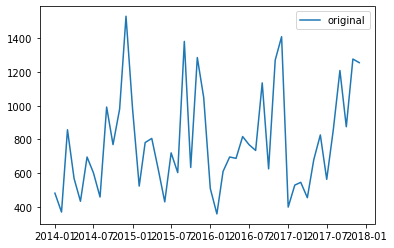

In [273]:
plt.plot(y, label= "original")
plt.legend(loc = "best")

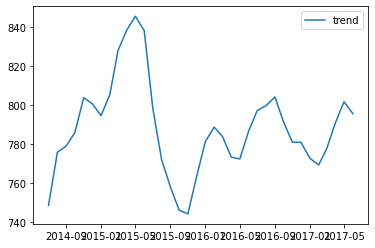

In [277]:
trend = decomposition.trend
plt.plot(trend, label ="trend")
plt.legend(loc = "best")

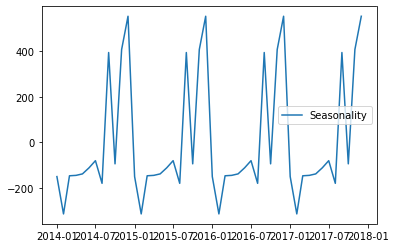

In [279]:
seso = decomposition.seasonal
plt.plot(seso, label = "Seasonality")
plt.legend(loc = "best")

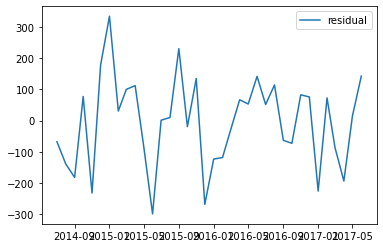

In [281]:
residual = decomposition.resid
plt.plot(residual, label = "residual")
plt.legend(loc = "best")

In [284]:
# lets do agumented Dikey fuller hyposthesis test t check the data is stationary or not
# null hyposthisis = the series has unit root (value of a = 1 ), non stationary
# Alternate hyposthis is the serires has not unit root and it is stationary



In [288]:
from statsmodels.tsa.stattools import adfuller
from pandas import Series

In [294]:
result = adfuller(y)
print("adf Sattistic: %f" % result[0])
print("pvalue: %f" % result[1]) # sationary if pvalue is less than 0.05
print("critial values")
for i, a in result[4].items():
    print(i,a)

adf Sattistic: -5.191070
pvalue: 0.000009
critial values
1% -3.6209175221605827
5% -2.9435394610388332
10% -2.6104002410518627


In [295]:
result

(-5.191070187339274,
 9.1687566556655e-06,
 10,
 37,
 {'1%': -3.6209175221605827,
  '5%': -2.9435394610388332,
  '10%': -2.6104002410518627},
 521.9616303121272)